<a href="https://colab.research.google.com/github/20JUNE22/capstone2023/blob/main/East_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Model for East of Washington

### Load data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
fd = pd.read_excel("https://github.com/20JUNE22/capstone2023/raw/main/clean_wa.xlsx")

fd

,EastofWA,PCTGQTRS,PovertyRate,MedianFamilyIncome,TractKids,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,...,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,2.41,11.0,67703,534,516,2326,2,11,0,...,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,0.00,18.2,62500,435,305,1524,24,12,2,...,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,0.42,29.0,42900,2656,477,3747,48,15,2,...,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,2.59,27.0,55521,1018,330,1764,13,29,0,...,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0.00,28.0,57831,1869,287,2342,22,58,0,...,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1,1.44,29.4,52059,1441,473,1459,17,42,7,...,2.675778,3.134814,1.255273,1.633468,0.903090,3.177248,3.146748,3.281488,1.806180,2.526339
1435,1,0.08,23.4,51875,1171,431,1164,12,13,3,...,2.635484,3.028978,1.113943,1.146128,0.602060,3.285557,2.748963,2.833784,1.799341,2.340444
1436,1,2.76,31.2,36659,2520,440,1106,31,130,7,...,2.644439,3.004751,1.505150,2.117271,0.903090,3.007748,3.651859,3.707655,2.012837,2.794488
1437,1,1.73,21.2,44451,1711,364,1750,30,23,0,...,2.562293,3.218798,1.491362,1.380211,0.000000,2.690196,3.380754,3.555820,1.924279,2.652246


In [ ]:
# drop the irrelevant inputs
wa = fd.drop(fd.columns[1:15], axis=1)


wa.head()

,EastofWA,FoodDesert,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,1,0,0.532754,1.075547,4.655551,2.719331,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,1,1,0.000000,1.281033,4.602494,2.628389,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,1,1,0.152288,1.475671,4.310481,3.422590,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,1,0,0.555094,1.445604,4.519316,3.003461,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,1,0,0.000000,1.460898,4.548647,3.269279,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822


### Subsets for WA

In [ ]:
# Two Subsets
east = wa[wa['EastofWA'] == 1] # Subset where EastofWA equals 1
west = wa[wa['EastofWA'] == 0] # Subset where EastofWA equals 0

# Drop the dimension
east = east.drop(['EastofWA'], axis=1)
west = west.drop(['EastofWA'], axis=1)

print(west.head())

    FoodDesert  log10_PCTGQTRS  log10_PovertyRate  log10_MedianFamilyIncome  \
61           1        1.709694           1.056905                  4.697308   
62           1        0.471292           1.494155                  4.401900   
63           1        0.394452           1.294466                  4.656367   
64           1        0.113943           1.190332                  4.706650   
65           1        0.737987           1.468347                  4.641375   

    log10_TractKids  log10_TractSeniors  log10_TractWhite  log10_TractBlack  \
61         2.187521            2.227887          3.075912          2.390935   
62         3.128076            2.701568          3.517855          1.462398   
63         2.530200            2.445604          3.061075          0.845098   
64         2.793092            2.778874          3.456518          0.845098   
65         2.925312            2.725912          3.474944          1.633468   

    log10_TractAsian  log10_TractNHOPI  log10_Trac

## East of Washington

### Method selection

In [ ]:
# divided wa data into the independent and dependent variables
X = east.drop(['FoodDesert'], axis = 1) # all independent
y = east['FoodDesert']  # target

X.head()

,log10_PCTGQTRS,log10_PovertyRate,log10_MedianFamilyIncome,log10_TractKids,log10_TractSeniors,log10_TractWhite,log10_TractBlack,log10_TractAsian,log10_TractNHOPI,log10_TractAIAN,log10_TractOMultir,log10_TractHispanic,log10_TractHUNV,log10_TractSNAP
0,0.532754,1.075547,4.655551,2.719331,2.713491,3.348500,0.477121,1.079181,0.000000,1.397940,1.924279,2.053078,1.944483,2.212188
1,0.000000,1.281033,4.602494,2.628389,2.485721,3.155032,1.397940,1.113943,0.477121,1.041393,2.220108,2.307496,1.204120,2.103804
2,0.152288,1.475671,4.310481,3.422590,2.679428,3.562531,1.690196,1.204120,0.477121,2.217484,3.470998,3.704494,2.096910,2.589950
3,0.555094,1.445604,4.519316,3.003461,2.519828,3.222456,1.146128,1.477121,0.000000,1.707570,3.000000,3.295347,2.060698,2.264818
4,0.000000,1.460898,4.548647,3.269279,2.459392,3.351603,1.361728,1.770852,0.000000,2.037426,3.346939,3.574031,1.041393,2.469822


In [ ]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1434    0
1435    1
1436    0
1437    0
1438    0
Name: FoodDesert, Length: 326, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data and split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the models you want to compare
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=123)),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('XGBoost', XGBClassifier(random_state=123)),
    ('LightGBM', LGBMClassifier(random_state=123)),
    ('SVM', SVC(random_state=123)),
    ('KNN', KNeighborsClassifier())
]

# Train and evaluate each model
for name, model in models:
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance using common metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the model's performance metrics
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print()

Logistic Regression Results:
Accuracy: 0.591
Precision: 0.647
Recall: 0.344
F1 Score: 0.449

Decision Tree Results:
Accuracy: 0.485
Precision: 0.450
Recall: 0.281
F1 Score: 0.346

Random Forest Results:
Accuracy: 0.636
Precision: 0.722
Recall: 0.406
F1 Score: 0.520

XGBoost Results:
Accuracy: 0.606
Precision: 0.688
Recall: 0.344
F1 Score: 0.458

LightGBM Results:
Accuracy: 0.591
Precision: 0.647
Recall: 0.344
F1 Score: 0.449

SVM Results:
Accuracy: 0.515
Precision: 0.000
Recall: 0.000
F1 Score: 0.000

KNN Results:
Accuracy: 0.561
Precision: 0.556
Recall: 0.469
F1 Score: 0.508



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Random Forest, Xgboost

### Random Forest baseline model


In [ ]:
# Print the model's performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_performance_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the Random Forest model
rf_base= RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model to the training data
rf_base.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_base.predict(X_test)



# Print the model's performance metrics
print(f"The baseline model Results:")
print_performance_metrics(y_test, y_pred)


# from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Calculate the classification report
# report = classification_report(y_test, y_pred)
# print("Classification Report:")
# print(report)

# # Calculate the ROC-AUC score
# roc_auc = roc_auc_score(y_test, y_pred)
# print(f"ROC-AUC Score: {roc_auc:.3f}")

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)

# # Plot the ROC curve
# plot_roc_curve(rf, X_test, y_test) # use the input data instead of the predicted labels
# plt.show()

The baseline model Results:
Accuracy: 0.636
Precision: 0.722
Recall: 0.406
F1 Score: 0.520


Accuracy: the baseline model has an accuracy of 0.636, which means that it correctly classified 63.6% of the test set samples.

Precision:the baseline model has a precision of 0.722, which means that when it predicted a positive label, it was correct 72.2% of the time.

Recall: the baseline model has a recall of 0.406, which means that it correctly identified only 40.6% of the actual positive samples.

Based on these results, it appears that the baseline model has room for improvement, particularly in terms of recall. A low recall score means that the model is failing to identify many of the areas that are actually food deserts.

### Outlier removal

In [ ]:
# create random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=123)


# remove outliers using the IQR method
Q1 = np.percentile(X_train, 25, axis=0)
Q3 = np.percentile(X_train, 75, axis=0)
IQR = Q3 - Q1
threshold = 1.5 * IQR
lower, upper = Q1 - threshold, Q3 + threshold
mask = np.logical_or(X_train < lower, X_train > upper)
X_train_no_outliers = X_train[~mask.any(axis=1)]
y_train_no_outliers = y_train[~mask.any(axis=1)]


# fit random forestn classifier on the new dataset without outliers
rf_clf.fit(X_train_no_outliers, y_train_no_outliers)

# evaluate random forest classifier on test set
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the model's performance metrics
print(f"The no_outlier model Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

The no_outlier model Results:
Accuracy: 0.561
Precision: 0.565
Recall: 0.406
F1 Score: 0.473


> Removing outliers doesn't improve the model.

In [ ]:
# print outliers
outliers = X_train[mask.any(axis=1)]
print(outliers)

      log10_PCTGQTRS  log10_PovertyRate  log10_MedianFamilyIncome  \
53          0.130334           0.633468                  4.911940   
1234        0.878522           1.514548                  4.306017   
1218        0.045323           1.120574                  4.882006   
1380        0.064458           1.204120                  4.704116   
242         1.009451           1.550228                  3.756180   
1434        0.387390           1.481443                  4.471277   
36          0.332438           1.618048                  4.074963   
250         0.225309           1.320146                  4.467416   
21          0.000000           0.869232                  4.928345   
1394        1.494711           1.627366                  3.861056   
1364        1.711807           1.713491                  4.597947   
23          0.000000           0.397940                  4.985229   
28          0.000000           0.785330                  5.099556   
1268        0.851870           1.0

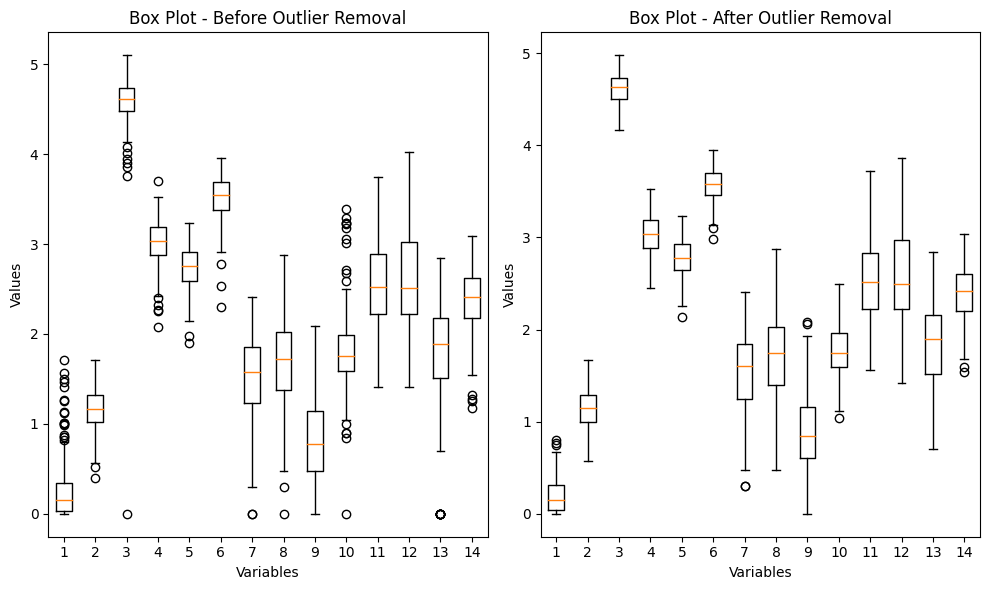

In [ ]:
import matplotlib.pyplot as plt

# Plot box plots of the variable before and after outlier removal
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot - Before Outlier Removal')

plt.subplot(1, 2, 2)
plt.boxplot(X_train_no_outliers)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot - After Outlier Removal')

plt.tight_layout()
plt.show()

### Feature selection

#### Feature importance

In [ ]:
# view the feature scores
feature_scores = pd.Series(rf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)


# # view a bar plot
# f, ax = plt.subplots(figsize=(30, 24))
# ax = sns.barplot(x=feature_scores, y=feature_scores.index)
# ax.set_title("Visualize feature scores of the features")
# ax.set_yticklabels(feature_scores.index)
# ax.set_xlabel("Feature importance score")
# ax.set_ylabel("Features")
# plt.show()

log10_TractSeniors          0.101362
log10_TractWhite            0.093133
log10_MedianFamilyIncome    0.080262
log10_TractHUNV             0.078010
log10_TractAsian            0.074170
log10_PovertyRate           0.071151
log10_TractKids             0.069519
log10_TractOMultir          0.068257
log10_TractHispanic         0.067512
log10_TractSNAP             0.066826
log10_TractAIAN             0.063735
log10_TractBlack            0.059338
log10_TractNHOPI            0.056707
log10_PCTGQTRS              0.050017
dtype: float64


In [ ]:
# drop the least important feature from X_train and X_test
X_train2 = X_train.drop(['log10_PCTGQTRS'], axis=1)
X_test2 = X_test.drop(['log10_PCTGQTRS'], axis=1)

# Train a new Random Forest model with the selected features
rf2 = RandomForestClassifier(n_estimators=100, random_state=123)
rf2.fit(X_train2, y_train)

# Evaluate the model on the test set
y_pred2 = rf2.predict(X_test2)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy of the model2: {accuracy2:.3f}")

Accuracy of the model2: 0.606


In [ ]:
# Store the initial feature scores
feature_scores = pd.Series(rf_base.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Initialize variables to track the best accuracy and the corresponding feature set
best_accuracy = 0
best_feature_set = []

# Create a list to store the dropped features and accuracies
dropped_features = []
accuracies = []

# Iterate over each feature to drop
for feature in feature_scores.index:
    # Create a new feature set by dropping the current feature
    selected_features = [f for f in X_train.columns if f not in [feature]]
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    # Train a new Random Forest model with the selected features
    rf = RandomForestClassifier(n_estimators=100, random_state=123)
    rf.fit(X_train_subset, y_train)

    # Evaluate the model on the test set
    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    # Check if the current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature_set = selected_features

    # Store the dropped feature and its corresponding accuracy
    dropped_features.append(feature)
    accuracies.append(accuracy)

# Print the best accuracy and the corresponding feature set
print(f"Best accuracy: {best_accuracy:.3f}")
print("Best feature set:", best_feature_set)


Best accuracy: 0.652
Best feature set: ['log10_PCTGQTRS', 'log10_PovertyRate', 'log10_MedianFamilyIncome', 'log10_TractKids', 'log10_TractSeniors', 'log10_TractWhite', 'log10_TractBlack', 'log10_TractAsian', 'log10_TractNHOPI', 'log10_TractAIAN', 'log10_TractOMultir', 'log10_TractHispanic', 'log10_TractSNAP']


> I dropped less important features, the model shows  improvement. 0.636 -> 0.652.

####  SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=123))
sel.fit(X_train, y_train)
sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)

# Create a new dataset with the selected features
X_train3 = X_train[selected_feat]
X_test3 = X_test[selected_feat]

# Train a new Random Forest model with the selected features
rf3= RandomForestClassifier(n_estimators=100, random_state=123)
rf3.fit(X_train3, y_train)

# Evaluate the model on the test set
y_pred3 = rf3.predict(X_test3)
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3:.3f}")


Index(['log10_MedianFamilyIncome', 'log10_TractSeniors', 'log10_TractWhite',
       'log10_TractAsian', 'log10_TractHUNV'],
      dtype='object')
accuracy: 0.591


> Using the selected feature does not improve the performance of the model.

#### Recursive feature elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
# create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=123)

# create the RFE model and select top 5 features
rfe = RFE(estimator=rf, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print("Selected Features:", list(X_train.columns[rfe.support_]))

# Evaluate the model on the test set
y_pred4 = rfe.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4:.3f}")

Selected Features: ['log10_MedianFamilyIncome', 'log10_TractSeniors', 'log10_TractWhite', 'log10_TractHUNV', 'log10_TractSNAP']
accuracy: 0.485


> REF does not improve the model. Since the three feature selections that I made did not improve the model's performance, I will proceed to the next step of hyperparameter tuning.

> Create new X_train and X_test sets using the best feature set

In [ ]:
# Create new X_train and X_test sets using the best feature set
X_train_b = X_train[best_feature_set]
X_test_b = X_test[best_feature_set]

# Train a new Random Forest model with the best feature set
rf_b = RandomForestClassifier(n_estimators=100, random_state=123)
rf_b.fit(X_train_b, y_train)

# Predict using the fitted model
y_pred = rf_b.predict(X_test_b)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the model's performance metrics
print(f"The model Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


The model Results:
Accuracy: 0.652
Precision: 0.737
Recall: 0.438
F1 Score: 0.549


### Hyperparameter tuning

#### Randomized Search Cross Validation

In [ ]:
# evaluating the performance of a classification model on both training and testing datasets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred):.3f}")
        print("__________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("__________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n==========================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred):.3f}")
        print("_________________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_________________________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=50, stop=1500, num=50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 11, num=2)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=123)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=200,
    cv=5,
    verbose=1,
    random_state=123,
    n_jobs=-1
)

rf_cv.fit(X_train_b, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf_best = RandomForestClassifier(**rf_best_params,random_state=123)
rf_clf_best.fit(X_train_b, y_train)

print_score(rf_clf_best, X_train_b, y_train, X_test_b, y_test, train=True)
print_score(rf_clf_best, X_train_b, y_train, X_test_b, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best paramters: {'n_estimators': 79, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 11, 'bootstrap': True})
Train Result:
Accuracy Score: 0.962
__________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.946746   0.989011  0.961538    0.967878      0.962839
recall       0.993789   0.909091  0.961538    0.951440      0.961538
f1-score     0.969697   0.947368  0.961538    0.958533      0.961195
support    161.000000  99.000000  0.961538  260.000000    260.000000
__________________________________________________________
Confusion Matrix: 
 [[160   1]
 [  9  90]]

Test Result:
Accuracy Score: 0.621
_________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.588235   0.733333  0.621212   0.660784      0.658586
recall      0.882353   0.343750  0.621

#### Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [10, 50, 100, 500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf2 = RandomForestClassifier(random_state=123)

rf_cv2 = GridSearchCV(
    rf_clf2,
    params_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)


rf_cv2.fit(X_train_b, y_train)
best_params2 = rf_cv2.best_params_
print(f"Best parameters: {best_params2}")

rf_clf_best2 = RandomForestClassifier(**best_params2, random_state=123)
rf_clf_best2.fit(X_train_b, y_train)

print_score(rf_clf_best2, X_train_b, y_train, X_test_b, y_test, train=True)
print_score(rf_clf_best2, X_train_b, y_train, X_test_b, y_test, train=False)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'bootstrap': False, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Train Result:
Accuracy Score: 0.762
__________________________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.746269   0.813559  0.761538    0.779914      0.771891
recall       0.931677   0.484848  0.761538    0.708263      0.761538
f1-score     0.828729   0.607595  0.761538    0.718162      0.744528
support    161.000000  99.000000  0.761538  260.000000    260.000000
__________________________________________________________
Confusion Matrix: 
 [[150  11]
 [ 51  48]]

Test Result:
Accuracy Score: 0.652
_________________________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.612245   0.764706  0.651515

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


> The cross-validated model rf_clf_best2: accuracy 0.652.

> Best parameters: 'bootstrap': False, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50

### Ensembling

#### Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from scipy import stats


# Initialize a list to store the random forest models
models = []

# Define the hyperparameters for the random forest model
rf_params = {'n_estimators': 100, 'max_depth': 5}

# Create 10 random forest models with different subsets of the training data
for i in range(10):
    # Create a bagging classifier with the random forest model as the base estimator
    bagging = BaggingClassifier(base_estimator=RandomForestClassifier(**rf_params),
                                n_estimators=10, random_state=i)

    # Fit the bagging classifier to the training data
    bagging.fit(X_train_b, y_train)

    # Add the trained model to the list
    models.append(bagging)

# Use the ensemble of models to make predictions on the test data
y_pred_ensemble = []
for model in models:
    y_pred_ensemble.append(model.predict(X_test_b))

# Take the mode of the predictions to get the final prediction
y_pred_ensemble = np.array(y_pred_ensemble)
y_pred_mode = stats.mode(y_pred_ensemble, keepdims=False)[0].ravel()


# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred_mode)
print(f"Ensemble accuracy: {accuracy:.3f}")

Ensemble accuracy: 0.636


#### Boosting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define the base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=123, bootstrap=False)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Define the ensemble model
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model)],
    voting='soft',  # use soft voting to take into account the predicted probabilities
)

# Fit the ensemble model
ensemble_model.fit(X_train_b, y_train)

# Make predictions on the test data
y_pred = ensemble_model.predict(X_test_b)

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble accuracy: {accuracy:.3f}")


Ensemble accuracy: 0.591


#### Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Define the individual classifiers
knn = KNeighborsClassifier()
rf = RandomForestClassifier(bootstrap= False, max_depth= 3, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators= 50,random_state=123)
lgbm = LGBMClassifier(random_state=123)
xgb = XGBClassifier(random_state=123)
lr = LogisticRegression(max_iter=1000,random_state=123)
svc = SVC(random_state=123)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('lgbm', lgbm), ('xgb', xgb), ('lr', lr), ('svc', svc)],
    voting='hard'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate the voting classifier
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the voting classifier: {:.3f}".format(accuracy))

Accuracy of the voting classifier: 0.606


> The ensembling doese not show any improvement.

### Validation

> The final model is rf_clf_best2.

* The accuracy score is 0.652, which means that the model classified 65.2% of the instances correctly.
* The precision for class 1 is 0.737, which means that of all the instances predicted as class 1, 73.7% are actually class 1.
* The recall for class 1 is 0.438, which means that of all the instances that are actually class 1, the model correctly identified 53.1% of them.
* The F1-score is 0.549 which is better than the baseline model 0.520.


In [ ]:
# Save the final model to a file
from joblib import dump

dump(rf_clf_best2, 'East_rf.pkl')


['East_rf.pkl']

### Visualization

In [ ]:
# Load the saved model from a file
from joblib import load
erf= load('East_rf.pkl')

Accuracy: 0.652
Precision: 0.765
Recall: 0.406
F1 Score: 0.531



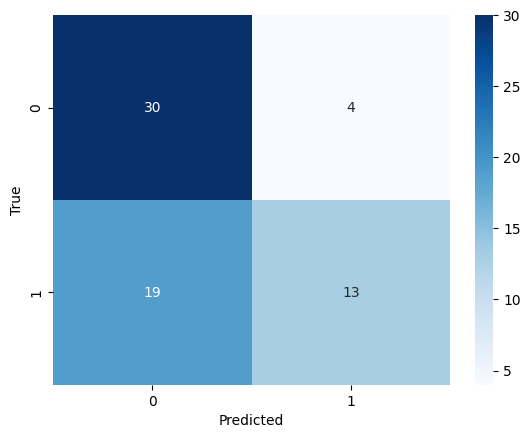

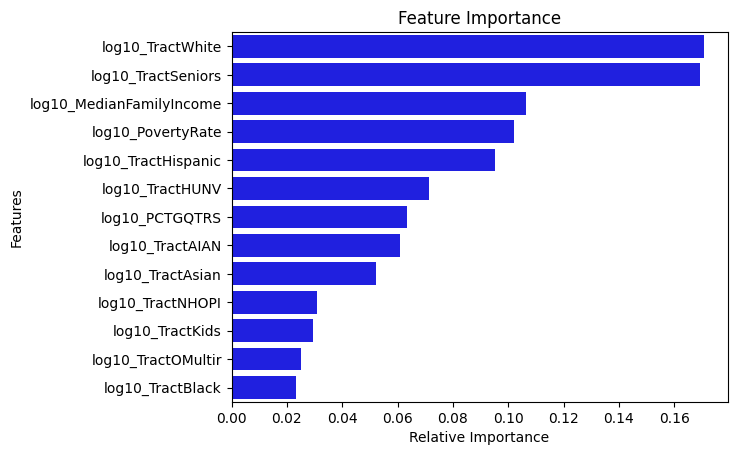

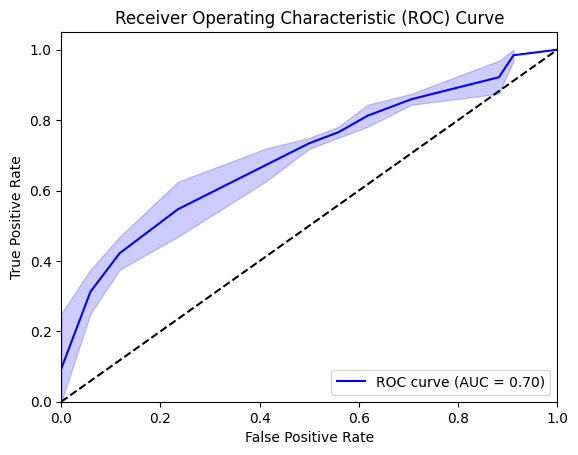

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Evaluate the model's performance using common metrics
y_pred = erf.predict(X_test_b)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print the model's performance metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print()


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance plot
importances = erf.feature_importances_
std = np.std([tree.feature_importances_ for tree in erf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

sns.barplot(x=importances[indices], y=X.columns[indices], color="b")
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# ROC curve
y_pred_prob = erf.predict_proba(X_test_b)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
sns.lineplot(x=fpr, y=tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


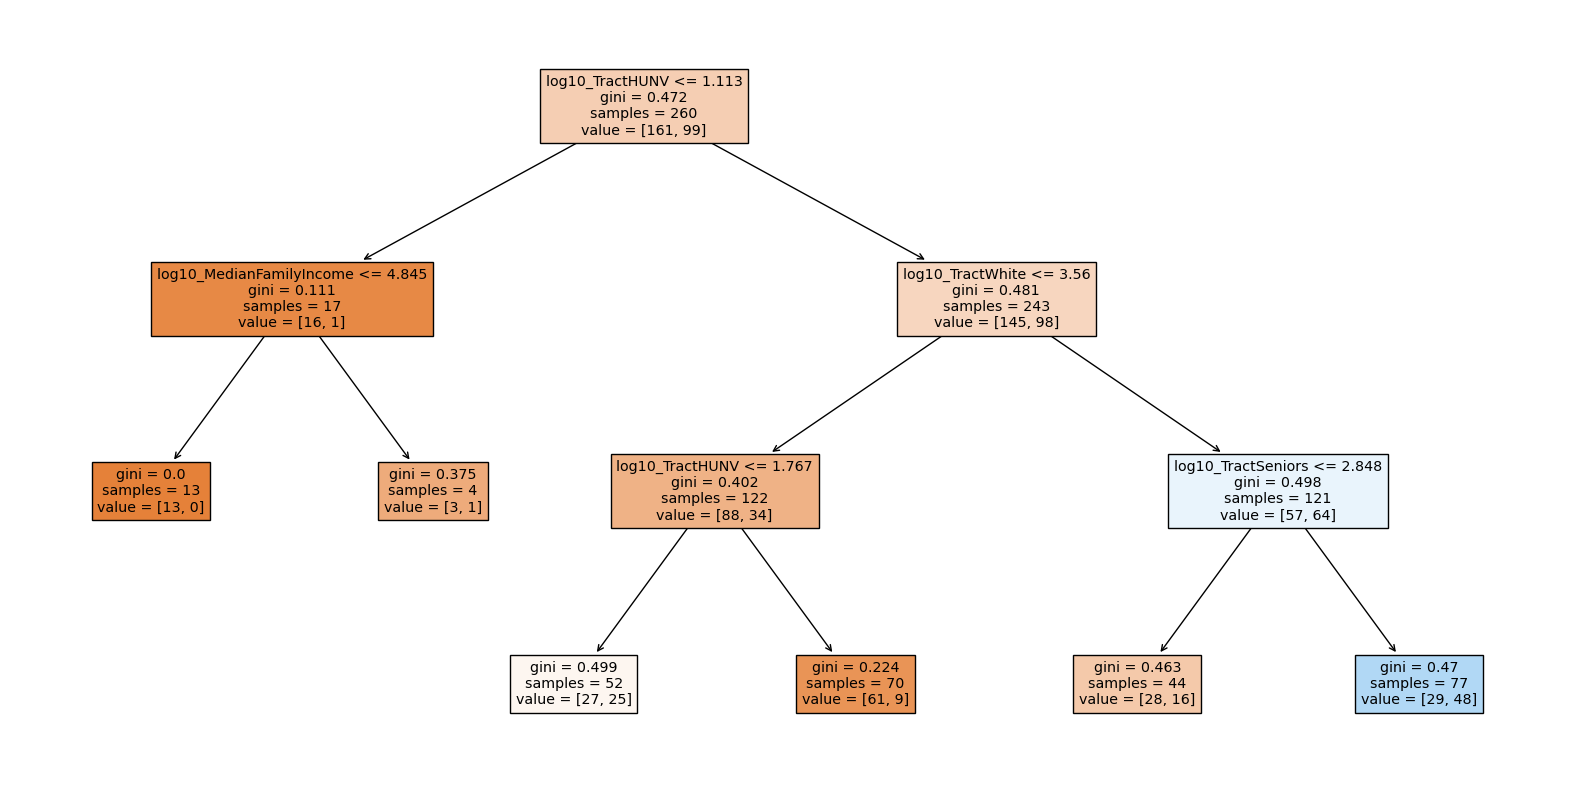

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select the first tree in the forest
tree = erf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns)
plt.show()


===============================================================================

In [ ]:
# import matplotlib.pyplot as plt

# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# # plot training and validation accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

# # plot training and validation loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


> Lasso with Random Forest Classification

In [ ]:
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import StandardScaler

# # Standardize the input features
# scaler = StandardScaler()
# X_train_std = scaler.fit_transform(X_train)

# # Fit a Lasso model
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train_std, y_train)

# # Select the features with non-zero coefficients
# selected_feat = X_train.columns[lasso.coef_ != 0]


# # summarize the selection of the attributes
# print("Selected Features:", list(X_train.columns[selected_feat]))

# # Train a Random Forest model using the selected features
# rf = RandomForestClassifier(n_estimators=100, random_state= 123)
# rf.fit(X_train[selected_feat], y_train)
# y_pred = rf.predict(X_test[selected_feat])
# accuracy = accuracy_score(y_test, y_pred)
# # # Evaluate the model on the test set
# # y_pred5 = rf.predict(X_test)
# # accuracy5 = accuracy_score(y_test, y_pred5)
# # print(f"Accuracy of the model5: {accuracy5:.3f}")




In [ ]:
# import lightgbm as lgb
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# from sklearn.model_selection import train_test_split

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a LightGBM dataset for training
# train_data = lgb.Dataset(X_train, label=y_train)

# # Set parameters for the model
# params = {
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'verbose': 0
# }

# # Train the model
# Baseline_model = lgb.train(params, train_data, num_boost_round=100)

# # Make predictions on the test set
# y_pred = Baseline_model.predict(X_test)

# # Convert probabilities to binary predictions
# y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred_binary)
# print("Baseline model accuracy:", accuracy)

# # Calculate the classification report
# report = classification_report(y_test, y_pred_binary)
# print("Classification Report:")
# print(report)

# # Calculate the ROC-AUC score
# roc_auc = roc_auc_score(y_test, y_pred)
# print("ROC-AUC Score:", roc_auc)

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred_binary)
# print("Confusion Matrix:\n", cm)


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import RidgeClassifier
# from sklearn.metrics import accuracy_score



# # Create a pipeline for feature selection and regularization
# pipe = Pipeline([
#     ('scaler', StandardScaler()),
#     ('feature_selection', SelectKBest(f_classif, k=5)),
#     ('classifier', RidgeClassifier(alpha=0.1))
# ])

# # Fit the pipeline on the training data
# pipe.fit(X_train, y_train)

# # Make predictions on the test data
# predictions = pipe.predict(X_test)

# # Evaluate the performance of the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)


In [ ]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # Create the Discriminant Analysis model
# model = LinearDiscriminantAnalysis()

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test data
# predictions = model.predict(X_test)

# # Evaluate the performance of the model
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

# report = classification_report(y_test, predictions)
# print("Classification Report:\n", report)


In [ ]:
# import lightgbm as lgb
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
# from sklearn.model_selection import train_test_split


# # Create a LightGBM dataset
# train_data = lgb.Dataset(X_train, label=y_train)

# # Set the hyperparameters
# params = {
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'max_depth': -1,
#     'min_child_samples': 20,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'n_jobs': -1,
#     'random_state': 42
# }

# # Train the model
# num_round = 100
# Baseline_model = lgb.train(params, train_data, num_round)

# # Make predictions on the test set
# y_pred = Baseline_model.predict(X_test)
# y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Baseline model accuracy:", accuracy)

# report = classification_report(y_test, y_pred)
# print("Classification Report:")
# print(report)

# roc_auc = roc_auc_score(y_test, y_pred)
# print("ROC-AUC Score:", roc_auc)

# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", cm)


In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Define the pipeline
# pipeline = Pipeline([
#   ('scaler', StandardScaler()), # Scale the features
#   ('selector', SelectKBest(f_classif, k=10)), # Select the top 10 features
#   ('model', LogisticRegression()) # Train the logistic regression model
# ])

# # Fit the pipeline on the training data
# pipeline.fit(train_data.drop('FoodDesert', axis=1), train_data['FoodDesert'])

# # Make predictions on the test data
# predictions = pipeline.predict(test_data.drop('FoodDesert', axis=1))

# # Evaluate the performance of the model
# accuracy = accuracy_score(test_data['FoodDesert'], predictions)
# print("Accuracy:", accuracy)
